In [14]:
import pandas as pd
data = pd.read_csv("carprices.csv")
data

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [15]:
data.groupby("Car Model").value_counts()

Car Model              Mileage  Sell Price($)  Age(yrs)
Audi A5                52000    32000          5           1
                       59000    29400          5           1
                       72000    19300          6           1
                       91000    12000          8           1
BMW X5                 22500    40000          2           1
                       35000    34000          3           1
                       46000    31500          4           1
                       57000    26100          5           1
                       69000    18000          6           1
Mercedez Benz C class  59000    33000          5           1
                       67000    22000          6           1
                       79000    21000          7           1
                       83000    20000          7           1
Name: count, dtype: int64

In [16]:
dummies = pd.get_dummies(data["Car Model"]).astype(int)

In [17]:
final_data = pd.concat([data , dummies] , axis= 1)
final_data

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [18]:
final_data.drop("Car Model"  , axis=1  , inplace= True)
final_data

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,69000,18000,6,0,1,0
1,35000,34000,3,0,1,0
2,57000,26100,5,0,1,0
3,22500,40000,2,0,1,0
4,46000,31500,4,0,1,0
5,59000,29400,5,1,0,0
6,52000,32000,5,1,0,0
7,72000,19300,6,1,0,0
8,91000,12000,8,1,0,0
9,67000,22000,6,0,0,1


In [21]:
x = final_data.drop("Sell Price($)" , axis= 1)

y = final_data["Sell Price($)"]

In [22]:
x

,Mileage,Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,69000,6,0,1,0
1,35000,3,0,1,0
2,57000,5,0,1,0
3,22500,2,0,1,0
4,46000,4,0,1,0
5,59000,5,1,0,0
6,52000,5,1,0,0
7,72000,6,1,0,0
8,91000,8,1,0,0
9,67000,6,0,0,1


In [23]:
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x,y)

LinearRegression()

In [25]:
model.score(x,y)

0.9417050937281082

In [26]:
modelpredictions = model.predict(x)
modelpredictions

array([18705.2723644 , 35286.78445645, 24479.19112468, 41245.76426391,
       29882.98779056, 28023.6135243 , 30614.46818502, 21879.57266964,
       12182.34562104, 26183.72387884, 18929.31674102, 20409.80511857,
       30477.15426156])

In [27]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

mean_squared_error(modelpredictions , y)

3447036.447703506

In [28]:
mean_absolute_error(modelpredictions , y)

1566.6866545053906

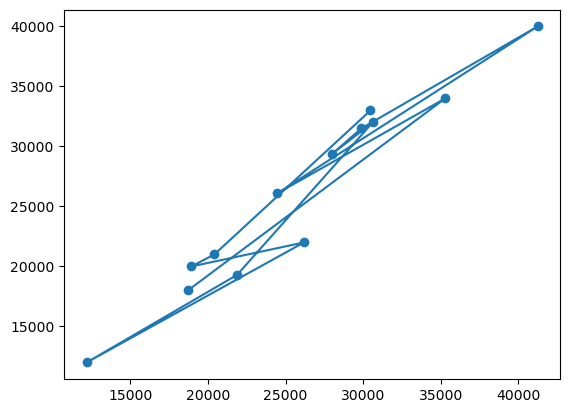

In [30]:
import matplotlib.pyplot as plt
plt.plot(modelpredictions , y)
plt.scatter(modelpredictions , y)

In [31]:
model.coef_

array([-3.70122094e-01, -1.33245363e+03,  6.10375284e+02, -3.67429130e+03,
        3.06391602e+03])

In [32]:
model.intercept_

55912.70994756205